In [15]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append('../..')
from hamp_pred.src.input_prep.prepare_sequence import MultiChainOperator, SeqWindow
from hamp_pred.src.input_prep.encode import MultiEncoder, OneHotEncoderSeq, RadianEncoder 
from hamp_pred.src.input_prep.encode import RadiousPhobosEncoder
from hamp_pred.src.predictor_config import PredictionConfig 
from hamp_pred.src.models.common.models import BaseConvolutionalWrapper 
from hamp_pred.src.predictor import Predictor

# Preapare data

In [2]:
DATA_DIR = '../../data/input'

# data set contains train and validation sets
# the val set is used for eraly stopping 
data = f'{DATA_DIR}/af2_all_params.p'
data = pd.read_pickle(data)

data['train_seq'] = data.apply(lambda x: x['n_seq'] + x['c_seq'], axis=1)


assert all(data['train_seq'].str.len() == 22)

# separate test set used to pick the best model
#data_test = f'{DATA_DIR}/af_clean_model_test.p'
#data_test = pd.read_pickle(data_test)

In [11]:
def get_mean_params(data):
    results = []
    for ind, row in data.iterrows():
        results.append([np.mean(row["rot"]), np.mean(row["shift_diff"]), np.mean(row["radius_diff"]), np.mean(row["pitch_diff"])])
    return pd.DataFrame(results, columns=["mean_rot", "mean_shift", "mean_radius", "mean_pitch"])
    


# Compute correlation

In [20]:
corr_frame = get_mean_params(data).corr()

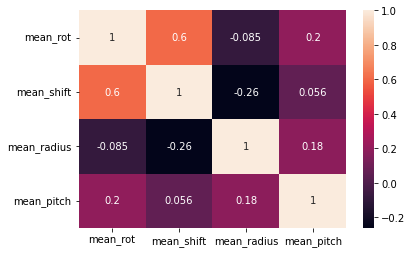

In [22]:
sns.heatmap(corr_frame, annot=True)
plt.show()